## Boxplots
Boxplots are very simple and useful. We may often need to do some data preparation\
before making the\
Replace _ to complete expressions and return the correct answe\
Restart R to remove previous results using: Ctrl/Cmd + shift + F1\
Remember - try to use google to help you answer question\
Load the tidyverse package with contains ggplot2\

In [1]:
library("tidyverse")

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


### 1. Boxplots

#### 1.1 Import the herbivores

In [2]:
herbivores <- read.csv(file = '../data/herbivore_specialisation.csv')

Shorten MacroalgaeHabitat names e.g. Colpomenia_peregrina to C.peregrina

In [3]:
herbivores <-
  herbivores %>% 
  mutate(MacroalgaeHabitat = sub('(.).*_', '\\1. ', MacroalgaeHabitat))

In [5]:
herbivores |> head(n = 2)

,MacroalgaeHabitat,DayNight,Replicate,MacroalgaeMass,Ampithoe_caddi,Ampithoe_kava,Ampithoe_ngana
,<chr>,<chr>,<int>,<dbl>,<int>,<int>,<int>
1,C. peregrina,D,1,7.9,0,0,0
2,C. peregrina,D,2,11.9,0,1,0


Combine the counts of Ampithoe and create a total counts per algae biomass
column.

In [10]:
herbivores <-
  herbivores |>
  mutate(total = Ampithoe_caddi + Ampithoe_kava + Ampithoe_ngana,
         total_per_mg = total / MacroalgaeMass)

In [11]:
herbivores |> head(n = 2)

,MacroalgaeHabitat,DayNight,Replicate,MacroalgaeMass,Ampithoe_caddi,Ampithoe_kava,Ampithoe_ngana,total,total_per_mg
,<chr>,<chr>,<int>,<dbl>,<int>,<int>,<int>,<int>,<dbl>
1,C. peregrina,D,1,7.9,0,0,0,0,0.00000000
2,C. peregrina,D,2,11.9,0,1,0,1,0.08403361


Remember\
we use + to add layers to ggplot()\
geom_boxplot\
colour= controls point line colour\
fill= controls fill colour\
alpha= controls the transparency

#### 1.2 Boxplot of Ampithoe species by macroalgae habitat
Create a boxplot of total_per_mg by MacroalgaeHabitat

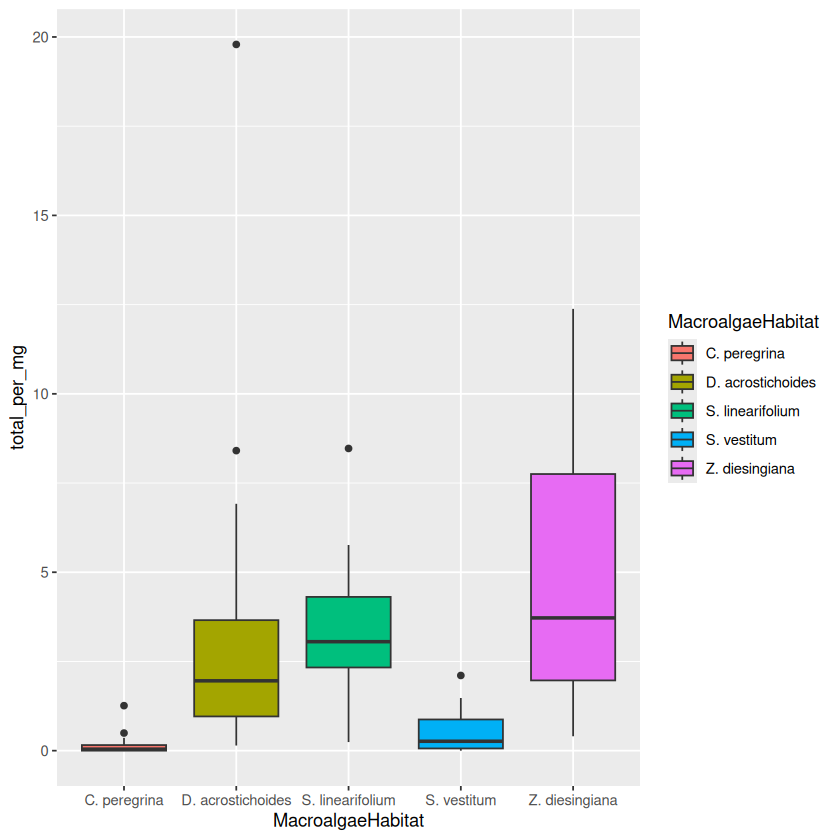

In [16]:
herbivores |>
ggplot(aes(x = MacroalgaeHabitat, y = total_per_mg, fill = MacroalgaeHabitat)) +
geom_boxplot()

#### 1.3 Altering the x-axis order
This section is more a tutorial for you to follow. It shows how we can link\
different R objects together. There will be minor things for you to complete.\
The x-axis groups are in alphabetical order as the column MacroalgaeHabitat is\ 
currently a 'character\
Examine the dataset using glimpse() and confirm MacroalgaeHabitat is character

In [17]:
glimpse(herbivores)

Rows: 100
Columns: 9
$ MacroalgaeHabitat <chr> "C. peregrina", "C. peregrina", "C. peregrina", "C. …
$ DayNight          <chr> "D", "D", "D", "D", "D", "D", "D", "D", "D", "D", "N…
$ Replicate         <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 1, 2, 3, 4, 5, 6, 7, …
$ MacroalgaeMass    <dbl> 7.9, 11.9, 14.0, 8.7, 12.3, 12.8, 9.2, 10.5, 12.6, 1…
$ Ampithoe_caddi    <int> 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 2, 0, 0, 0, 3, 0, 2, 0…
$ Ampithoe_kava     <int> 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0…
$ Ampithoe_ngana    <int> 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 12, 0, 0, 0, 0, 1, 1, …
$ total             <int> 0, 1, 0, 1, 0, 4, 0, 0, 0, 1, 14, 0, 0, 0, 3, 1, 4, …
$ total_per_mg      <dbl> 0.00000000, 0.08403361, 0.00000000, 0.11494253, 0.00…


We can turn this column into a factor column: a special grouping/categorical column\
in R. When we do this, we can alter the order of the categories. By default they will\
be in alphabetical order.

In [18]:
herbivores <-
  herbivores %>% 
  mutate(MacroalgaeHabitat = factor(MacroalgaeHabitat))

See it is now a factor column <fct>

In [19]:
glimpse(herbivores)

Rows: 100
Columns: 9
$ MacroalgaeHabitat <fct> C. peregrina, C. peregrina, C. peregrina, C. peregri…
$ DayNight          <chr> "D", "D", "D", "D", "D", "D", "D", "D", "D", "D", "N…
$ Replicate         <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 1, 2, 3, 4, 5, 6, 7, …
$ MacroalgaeMass    <dbl> 7.9, 11.9, 14.0, 8.7, 12.3, 12.8, 9.2, 10.5, 12.6, 1…
$ Ampithoe_caddi    <int> 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 2, 0, 0, 0, 3, 0, 2, 0…
$ Ampithoe_kava     <int> 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0…
$ Ampithoe_ngana    <int> 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 12, 0, 0, 0, 0, 1, 1, …
$ total             <int> 0, 1, 0, 1, 0, 4, 0, 0, 0, 1, 14, 0, 0, 0, 3, 1, 4, …
$ total_per_mg      <dbl> 0.00000000, 0.08403361, 0.00000000, 0.11494253, 0.00…


The current levels alphabetically, as in the plot\
"C. peregrina" "D. acrostichoides" "S. linearifolium"  "S. vestitum" "Z. diesingiana" 

In [20]:
levels(herbivores$MacroalgaeHabitat)

[1] "C. peregrina"      "D. acrostichoides" "S. linearifolium" 
[4] "S. vestitum"       "Z. diesingiana"

We can reorder the levels. Lets determine an order based on the mean abundance.\
If we create a summary dataset by:
1. calculating mean total_per_mg by MacroalgaeHabitat
2. Arrange the data by mean

The MacroalgaeHabitat column will have unique values of MacroalgaeHabitat in abundance order.

In [21]:
herbivores_summary <-
  herbivores %>% 
  group_by(MacroalgaeHabitat) %>% 
  summarise(total_per_mg = mean(total_per_mg)) %>% 
  arrange(desc(total_per_mg))

Observe the value order MacroalgaeHabitat 

In [22]:
herbivores_summary

MacroalgaeHabitat,total_per_mg
<fct>,<dbl>
Z. diesingiana,4.8976432
D. acrostichoides,3.3470637
S. linearifolium,3.3260355
S. vestitum,0.5350853
C. peregrina,0.1599193


We can pass on unique and ordered values from herbivores_summary into the factor()
function to specific what order we want to factor groups to be.

In [23]:
herbivores <-
  herbivores %>% 
  mutate(MacroalgaeHabitat = factor(MacroalgaeHabitat, 
                                    levels = herbivores_summary$MacroalgaeHabitat)) # order of names

Compare this to line 69 above

In [24]:
levels(herbivores$MacroalgaeHabitat)

[1] "Z. diesingiana"    "D. acrostichoides" "S. linearifolium" 
[4] "S. vestitum"       "C. peregrina"

Now make the boxplot and see how the order has changed


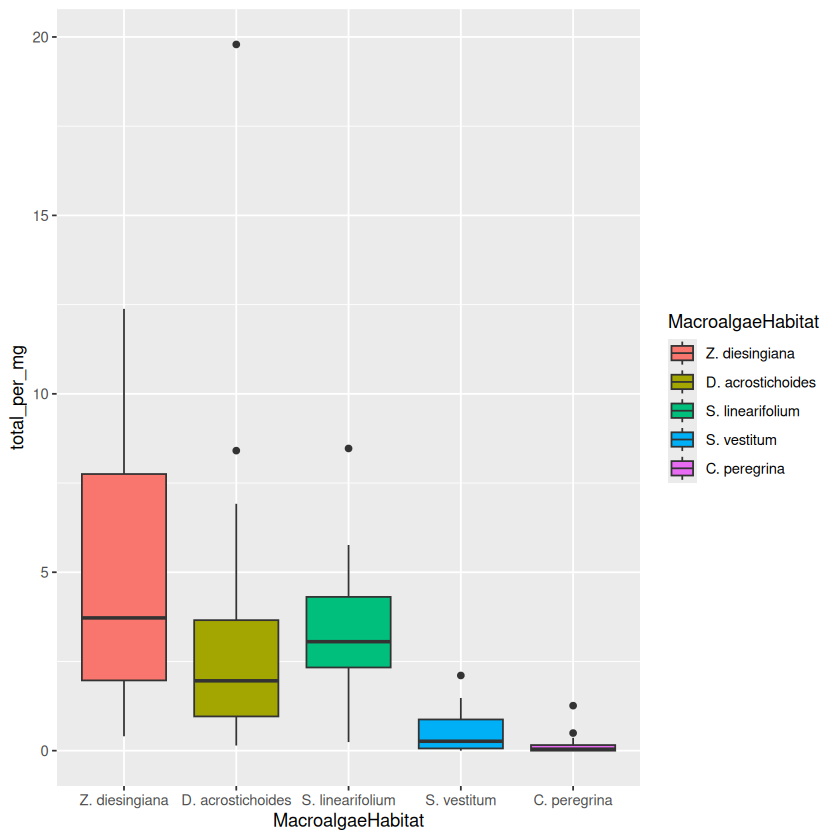

In [25]:
herbivores |>
ggplot(aes(x = MacroalgaeHabitat, y = total_per_mg, fill = MacroalgaeHabitat)) +
geom_boxplot()

#### 1.4 Adding other aesthetics
The data also has a DayNight column - the counts of organisms during the day\
or night. We want to include that grouping column in the boxplot\
Include DayNight as a fill aesthetic 

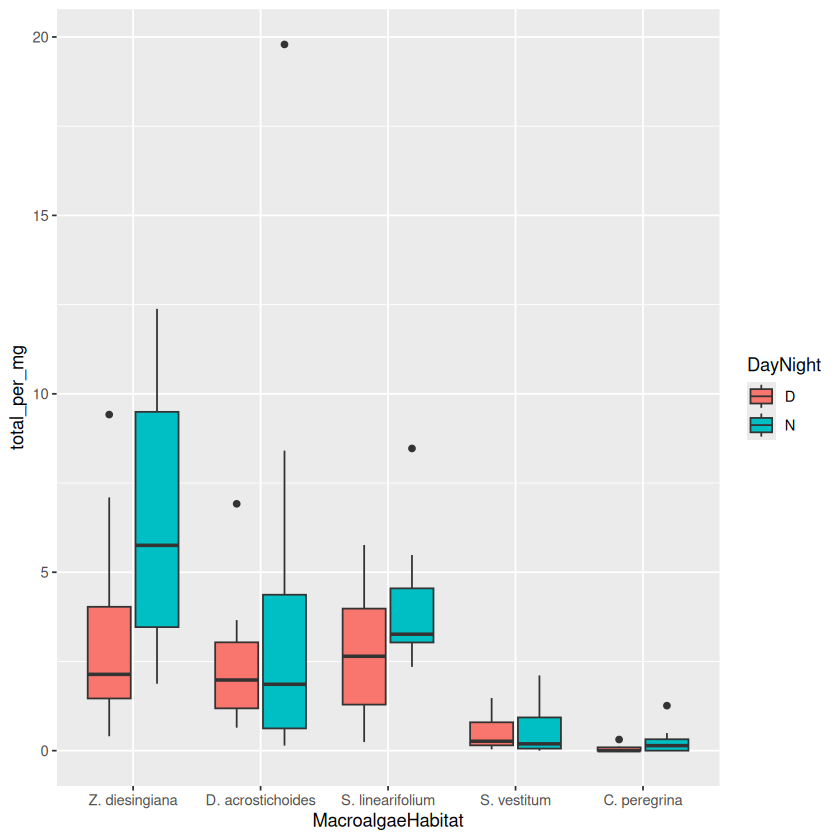

In [26]:
herbivores %>% 
  ggplot(aes(x = MacroalgaeHabitat, y = total_per_mg, fill = DayNight)) +
  geom_boxplot()

Is there a greater abundance during the day or night?\
***-> It seems to be greater abundance during the night.***

Is it consistent across macroalgae habitats?\
***->It seems to be consistent accross macroalgae habitats.***

#### 1.5 A horizontal boxplot
Remake the plot from 1.4 but make it a horizontal boxplot\
Simply change what x and y are.

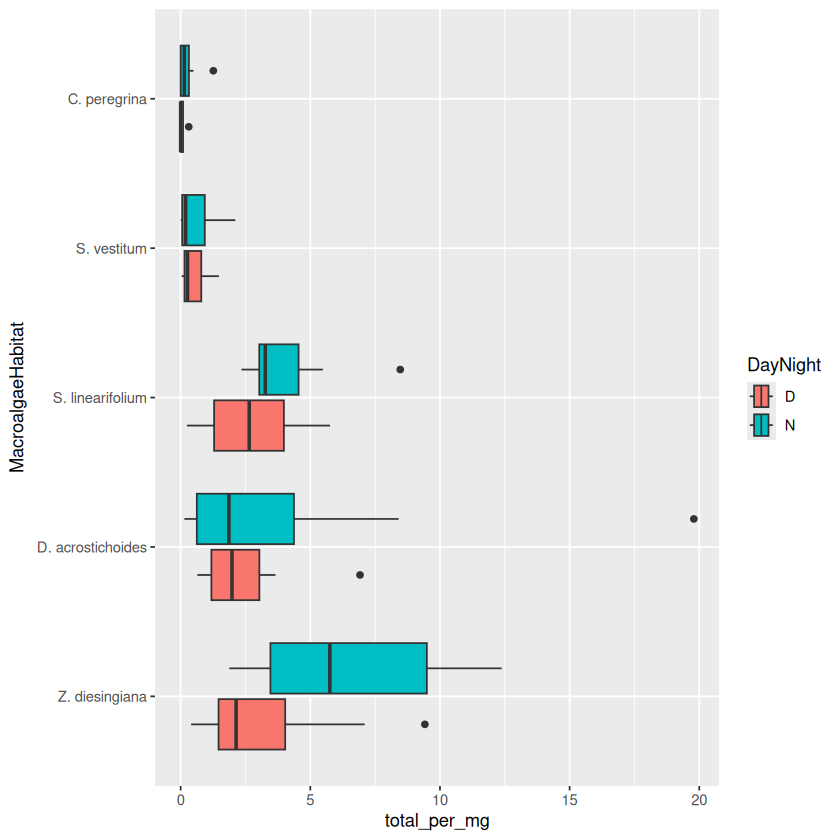

In [29]:
herbivores %>% 
  ggplot(aes(x = total_per_mg, y = MacroalgaeHabitat, fill = DayNight)) +
  geom_boxplot()

Since we ordered MacroalgaeHabitat by abundance, what direction is that with\
a horizontal boxplot? top to bottom or bottom to top? (The previous was left to right)\
***-> Now it is bottom to top.***

#### 1.6 Greyscale plot
Sometimes it costs more money for colour images in scientific journals.\
Let's alter the colours manually\
The configuration layer function here is: *scale_fill_manual*\
scale = a type of aesthetic that can change\
fill = we are altering the fill of the boxplots\
manual = we will choose colours manually\
The help file is quite detailed, however, the values argument is what we need.\
values: a set of aesthetic values to map data values to. ... If this is a \
named vector, then the values will be matched based on the names instead.\
scale_fill_manual(values = c("colour1", "colour1"))\
scale_fill_manual(values = c(value_in_column_1 = "colour1", value_in_column_1 = "colour1"))

In [ ]:
?scale_fill_manual

Colour the D bars "white" and the N bars "grey50"

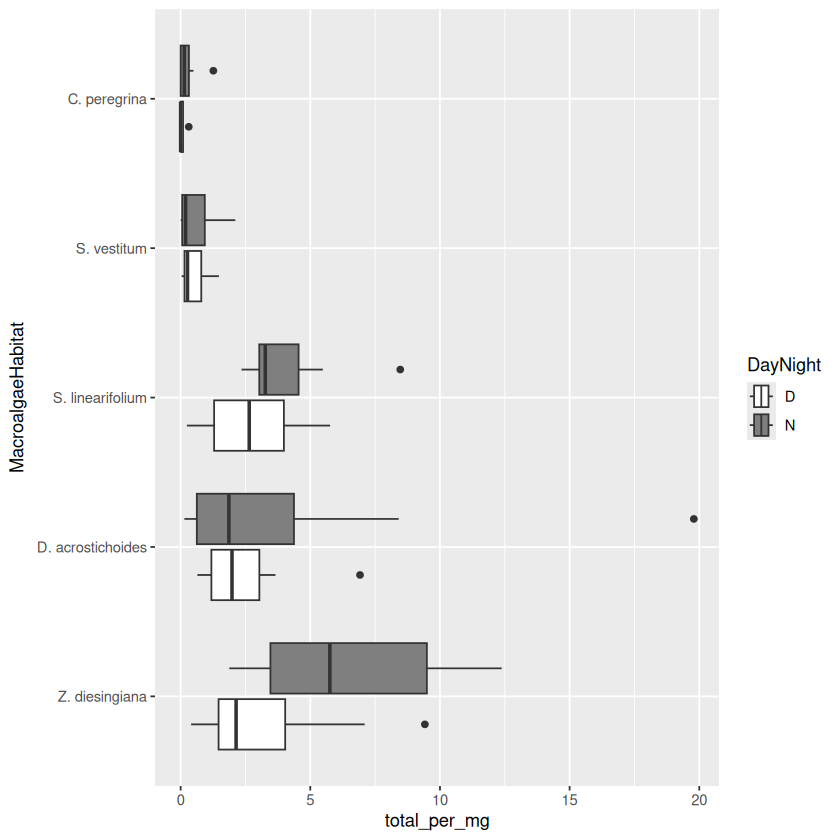

In [36]:
herbivores %>% 
  ggplot(aes(y = MacroalgaeHabitat, x = total_per_mg, fill = DayNight)) +
  geom_boxplot() +
  scale_fill_manual(values = c(D = "white", N = "grey50"))

### Extra exercises
#### 1.6 Finalise the plot
 1. Update the x and y axes titles, and the title of the plot
 2. Use theme_minimal()
 3. Export the plot to png